In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering, SpectralBiclustering, SpectralCoclustering
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import umap
import matplotlib.pyplot as plt
import pickle
import sys
from pathlib import Path
sys.path.insert(0, "..")   


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
path = "../output/data/top_gc_median_df_model.pickle"
d = pickle.load(open(path, "rb"))
d

{'U': array([[1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1],
        [1, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 1, 1, 0, 0]], dtype=int8),
 'V': array([[1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 1],
        [1, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]], dtype=int8),
 'B': array([[-0.03553059, -0.04411684,  0.46357586,  0.19468938, -0.03143649,
         -0.04060847],
        [ 0.25096057,  0.34167473,  0.05320997,  0.2599746 , -0.19089299,
          0.4073448 ],
        [ 0.07711335,  0.5263763 , -0.01327009,  0.0075135 ,  0.03046881,
          0.33453406],
        [ 0.13193667, -0.02880669,  0.25057734,  0.18069698, -0.00153941,
          0.07115281],
        [

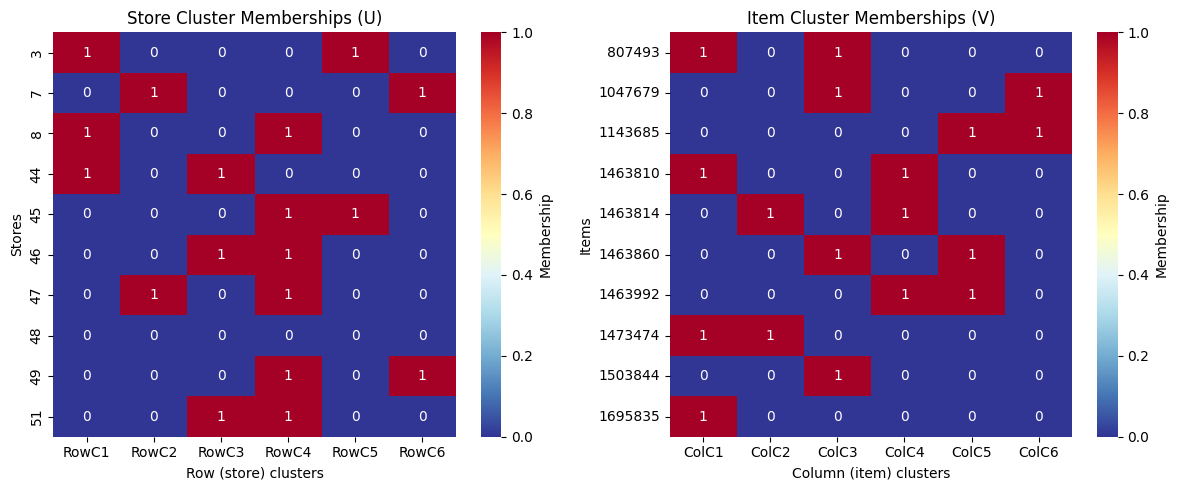

In [4]:

U = d["U"]              # shape: (n_stores, K_row)
V = d["V"]              # shape: (n_items, K_col)
row_names = np.asarray(d.get("row_names", np.arange(U.shape[0])))
col_labels = np.asarray(d.get("col_labels", np.arange(V.shape[0]).astype(str)))

# If the first column label is a header like "store", drop it to match item rows
if len(col_labels) == V.shape[0] + 1 and str(col_labels[0]).lower() == "store":
    item_labels = col_labels[1:]
else:
    # If lengths mismatch for any other reason, coerce safely
    item_labels = col_labels[:V.shape[0]]

# Build cluster labels from actual rank
u_cluster_labels = [f"RowC{j+1}" for j in range(U.shape[1])]
v_cluster_labels = [f"ColC{k+1}" for k in range(V.shape[1])]
store_labels = [str(s) for s in row_names]
item_labels = [str(x) for x in item_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Store memberships (U)
sns.heatmap(
    U, annot=True, fmt="d", cmap="RdYlBu_r",
    cbar_kws={"label": "Membership"},
    xticklabels=u_cluster_labels,
    yticklabels=store_labels,
    ax=ax1
)
ax1.set_title("Store Cluster Memberships (U)")
ax1.set_xlabel("Row (store) clusters")
ax1.set_ylabel("Stores")

# Item memberships (V)
sns.heatmap(
    V, annot=True, fmt="d", cmap="RdYlBu_r",
    cbar_kws={"label": "Membership"},
    xticklabels=v_cluster_labels,
    yticklabels=item_labels,
    ax=ax2
)
ax2.set_title("Item Cluster Memberships (V)")
ax2.set_xlabel("Column (item) clusters")
ax2.set_ylabel("Items")

plt.tight_layout()
plt.show()

In [7]:
X = pd.read_parquet("../output/data/top_gc_median_df.parquet")
X

item,807493,1047679,1143685,1463810,1463814,1463860,1463992,1473474,1503844,1695835
store,,,,,,,,,,
3,0.147159,0.162991,0.151782,0.153722,0.160758,0.156719,0.161017,0.161017,0.164501,0.161017
7,0.144068,0.174722,0.164484,0.156023,0.159292,0.153390,0.200583,0.159653,0.161017,0.151959
8,0.164087,0.161017,0.132725,0.157335,0.156145,0.166168,0.175746,0.153344,0.161017,0.159307
44,0.155800,0.150228,0.135578,0.150305,0.159894,0.166377,0.157395,0.156845,0.158575,0.140929
45,0.149440,0.121377,0.153420,0.154592,0.160269,0.161017,0.161017,0.159001,0.161017,0.161017
46,0.123408,0.156183,0.151130,0.148181,0.161017,0.152264,0.161017,0.155569,0.171596,0.145605
47,0.153502,0.172993,0.135800,0.160292,0.160376,0.158889,0.155852,0.160252,0.160090,0.157297
48,0.150306,0.161036,0.130676,0.155722,0.153139,0.162842,0.157744,0.156963,0.161017,0.150082
49,0.138820,0.163944,0.154201,0.156708,0.155888,0.170573,0.161768,0.155709,0.159914,0.161017


In [6]:
d["U"] 

array([[1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0]], dtype=int8)

In [10]:
X

item,807493,1047679,1143685,1463810,1463814,1463860,1463992,1473474,1503844,1695835
store,,,,,,,,,,
3,0.147159,0.162991,0.151782,0.153722,0.160758,0.156719,0.161017,0.161017,0.164501,0.161017
7,0.144068,0.174722,0.164484,0.156023,0.159292,0.153390,0.200583,0.159653,0.161017,0.151959
8,0.164087,0.161017,0.132725,0.157335,0.156145,0.166168,0.175746,0.153344,0.161017,0.159307
44,0.155800,0.150228,0.135578,0.150305,0.159894,0.166377,0.157395,0.156845,0.158575,0.140929
45,0.149440,0.121377,0.153420,0.154592,0.160269,0.161017,0.161017,0.159001,0.161017,0.161017
46,0.123408,0.156183,0.151130,0.148181,0.161017,0.152264,0.161017,0.155569,0.171596,0.145605
47,0.153502,0.172993,0.135800,0.160292,0.160376,0.158889,0.155852,0.160252,0.160090,0.157297
48,0.150306,0.161036,0.130676,0.155722,0.153139,0.162842,0.157744,0.156963,0.161017,0.150082
49,0.138820,0.163944,0.154201,0.156708,0.155888,0.170573,0.161768,0.155709,0.159914,0.161017


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple
from scipy.cluster.hierarchy import linkage, leaves_list

def multi_membership_order(
    M: np.ndarray,
    method: str = "average",
    metric: str = "cosine",
    optimal_ordering: bool = True,
) -> np.ndarray:
    jitter = 1e-9 * np.random.RandomState(0).randn(*M.shape)
    Z = linkage(M + jitter, method=method, metric=metric, optimal_ordering=optimal_ordering)
    return leaves_list(Z)

def plot_graded_overlapping_patches_df(
    X_df,          # pandas DataFrame: rows = stores, cols = items
    U: np.ndarray, # (n_rows, R)
    V: np.ndarray, # (n_cols, C)
    *,
    center: Optional[float] = None,
    cmap: str = "RdBu_r",
    figsize: Tuple[int, int] = (10, 9),
    fontsize: int = 8,
):
    """
    Same graded-overlap visualization, but preserves DataFrame labels.
    Returns figure and (row_order, col_order) plus the reordered labels.
    """
    import pandas as pd
    assert hasattr(X_df, "values"), "X_df must be a pandas DataFrame"
    X = X_df.values
    row_names = X_df.index.to_list()
    col_names = X_df.columns.to_list()

    n_rows, n_cols = X.shape
    assert U.shape[0] == n_rows, "U rows must match X_df.index"
    assert V.shape[0] == n_cols, "V cols must match X_df.columns"

    # --- graded ordering by membership similarity ---
    row_order = multi_membership_order(U)
    col_order = multi_membership_order(V)

    # reorder
    Xr = X[np.ix_(row_order, col_order)]
  

    # sensible center
    if center is None:
        center = np.median(X) if np.min(X) >= 0 else 0.0

    # ---- layout (top membership bar for columns, left for rows) ----
    from matplotlib.gridspec import GridSpec
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(nrows=3, ncols=3, height_ratios=[0.35, 0.02, 1.0],
                  width_ratios=[0.35, 0.02, 1.0], figure=fig)

    # main heatmap
    ax = fig.add_subplot(gs[2, 2])
    row_labels = [str(row_names[i]) for i in row_order]
    col_labels = [str(col_names[j]) for j in col_order]

    sns.heatmap(
    Xr, cmap=cmap, center=center, cbar=True, ax=ax,
    yticklabels=row_labels,   # seaborn centers these at 0.5, 1.5, ...
    xticklabels=col_labels
    )

    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_ylabel("store", fontsize=fontsize+1)
    ax.set_xlabel("item",  fontsize=fontsize+1)

    ax.set_title("Graded overlapping patches (membership-ordered)", fontsize=fontsize+2)

    plt.tight_layout()
    plt.show()

 

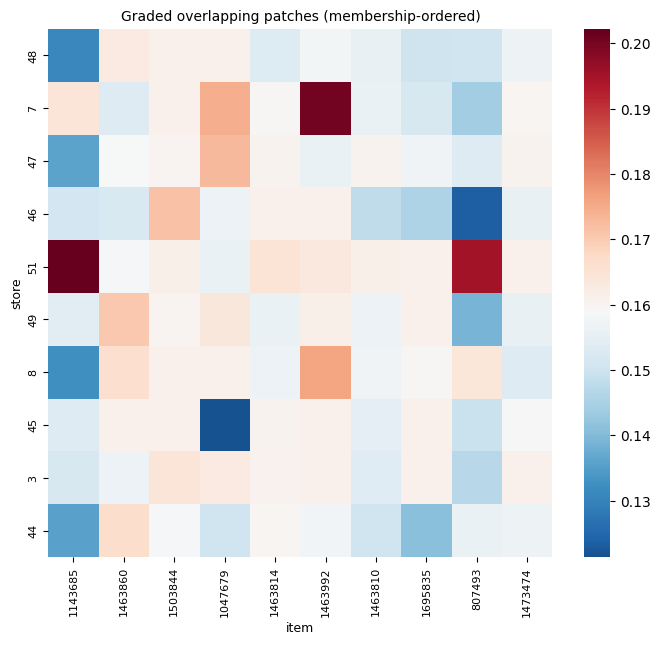

In [25]:
plot_graded_overlapping_patches_df(
    X, d["U"], d["V"],
    cmap="RdBu_r",
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple
from scipy.cluster.hierarchy import linkage, leaves_list
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def multi_membership_order(
    M: np.ndarray,
    method: str = "average",
    metric: str = "cosine",
    optimal_ordering: bool = True,
) -> np.ndarray:
    """Order rows to group similar membership profiles (graded patches)."""
    jitter = 1e-9 * np.random.RandomState(0).randn(*M.shape)
    Z = linkage(M + jitter, method=method, metric=metric, optimal_ordering=optimal_ordering)
    return leaves_list(Z)

def plot_graded_overlapping_patches_df(
    X_df,          # pandas DataFrame: rows = stores, cols = items
    U: np.ndarray, # (n_rows, R)
    V: np.ndarray, # (n_cols, C)
    *,
    center: Optional[float] = None,
    cmap: str = "RdBu_r",
    figsize: Tuple[int, int] = (6,6),
    fontsize: int = 8,
    bar_height_frac: float = 0.12,       # fraction of heatmap height for top bar
    bar_width_frac: float = 0.12,        # fraction of heatmap width for left bar
):
    """
    Graded-overlap heatmap with centered labels, no GridSpec.
    Optionally adds slim membership bars via inset axes.
    Returns fig, ax, (row_order, col_order).
    """
    X = X_df.values
    row_names = X_df.index.to_list()
    col_names = X_df.columns.to_list()

    n_rows, n_cols = X.shape
    assert U.shape[0] == n_rows, "U rows must match X_df.index"
    assert V.shape[0] == n_cols, "V cols must match X_df.columns"

    # --- graded ordering by membership similarity ---
    row_order = multi_membership_order(U)
    col_order = multi_membership_order(V)

    # reorder
    Xr = X[np.ix_(row_order, col_order)]
    Ur = U[row_order]
    Vr = V[col_order]

    # sensible center
    if center is None:
        center = np.median(X) if np.nanmin(X) >= 0 else 0.0

    # ---- single-axes heatmap ----
    fig, ax = plt.subplots(figsize=figsize)

    row_labels = [str(row_names[i]) for i in row_order]
    col_labels = [str(col_names[j]) for j in col_order]

    sns.heatmap(
        Xr, cmap=cmap, center=center, cbar=True, ax=ax,
        yticklabels=row_labels,  # seaborn centers at 0.5, 1.5, ...
        xticklabels=col_labels
    )
    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_ylabel("store", fontsize=fontsize+1)
    ax.set_xlabel("item",  fontsize=fontsize+1)
    ax.set_title("Graded overlapping patches (membership-ordered)", fontsize=fontsize+2)

    plt.tight_layout()
    return fig, ax, (row_order, col_order)


(<Figure size 600x600 with 2 Axes>,
 <Axes: title={'center': 'Graded overlapping patches (membership-ordered)'}, xlabel='item', ylabel='store'>,
 (array([7, 1, 6, 5, 9, 8, 2, 4, 0, 3], dtype=int32),
  array([2, 5, 8, 1, 4, 6, 3, 9, 0, 7], dtype=int32)))

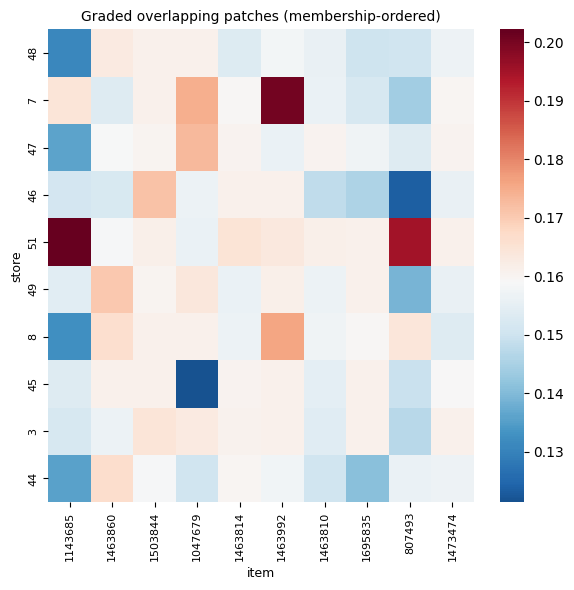

In [31]:
plot_graded_overlapping_patches_df(
    X, d["U"], d["V"],
    cmap="RdBu_r",
)


In [32]:
X

item,807493,1047679,1143685,1463810,1463814,1463860,1463992,1473474,1503844,1695835
store,,,,,,,,,,
3,0.147159,0.162991,0.151782,0.153722,0.160758,0.156719,0.161017,0.161017,0.164501,0.161017
7,0.144068,0.174722,0.164484,0.156023,0.159292,0.153390,0.200583,0.159653,0.161017,0.151959
8,0.164087,0.161017,0.132725,0.157335,0.156145,0.166168,0.175746,0.153344,0.161017,0.159307
44,0.155800,0.150228,0.135578,0.150305,0.159894,0.166377,0.157395,0.156845,0.158575,0.140929
45,0.149440,0.121377,0.153420,0.154592,0.160269,0.161017,0.161017,0.159001,0.161017,0.161017
46,0.123408,0.156183,0.151130,0.148181,0.161017,0.152264,0.161017,0.155569,0.171596,0.145605
47,0.153502,0.172993,0.135800,0.160292,0.160376,0.158889,0.155852,0.160252,0.160090,0.157297
48,0.150306,0.161036,0.130676,0.155722,0.153139,0.162842,0.157744,0.156963,0.161017,0.150082
49,0.138820,0.163944,0.154201,0.156708,0.155888,0.170573,0.161768,0.155709,0.159914,0.161017


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple
from scipy.cluster.hierarchy import linkage, leaves_list

def multi_membership_order(M, method="average", metric="cosine", optimal_ordering=True):
    jitter = 1e-9 * np.random.RandomState(0).randn(*M.shape)
    Z = linkage(M + jitter, method=method, metric=metric, optimal_ordering=optimal_ordering)
    return leaves_list(Z)

def plot_graded_overlapping_patches_df(
    X_df,          # pandas DataFrame: rows = stores, cols = items
    U: np.ndarray, # (n_rows, R)
    V: np.ndarray, # (n_cols, C)
    *,
    center: Optional[float] = None,
    cmap: str = "RdBu_r",
    figsize: Tuple[int, int] = (6, 6),
    fontsize: int = 8,
    # ---- NEW annotation controls ----
    annotate: str = "pct",          # 'none' | 'abs' | 'pct' | 'zscore'
    median_mode: str = "global",    # 'global' | 'row' | 'col'
    min_abs: float = 0.005,         # only used when annotate='abs'
    min_pct: float = 1.0,           # % threshold when annotate='pct'
    min_z: float = 0.5,             # |z| threshold when annotate='zscore'
):
    """
    Graded-overlap heatmap (no GridSpec) with optional per-cell annotation:
      abs:  value - median
      pct: (value - median) / median
      zscore: (value - median) / MAD*1.4826 (robust)
    """
    X = X_df.values
    row_names = X_df.index.to_list()
    col_names = X_df.columns.to_list()

    n_rows, n_cols = X.shape
    assert U.shape[0] == n_rows, "U rows must match X_df.index"
    assert V.shape[0] == n_cols, "V cols must match X_df.columns"

    # --- membership-similarity order ---
    row_order = multi_membership_order(U)
    col_order = multi_membership_order(V)

    # reorder
    Xr = X[np.ix_(row_order, col_order)]

    # sensible center for colormap
    if center is None:
        center = np.nanmedian(X) if np.nanmin(X) >= 0 else 0.0

    # ---------- build annotation matrix (strings) ----------
    labels = None
    if annotate.lower() != "none":
        # medians aligned with the reordered matrix
        if median_mode == "global":
            med = np.nanmedian(X)
            diff = Xr - med
            med_den = med
        elif median_mode == "row":
            med_row = np.nanmedian(X, axis=1, keepdims=True)
            med = med_row[row_order, :]
            diff = Xr - med
            med_den = med
        elif median_mode == "col":
            med_col = np.nanmedian(X, axis=0, keepdims=True)
            med = med_col[:, col_order]
            diff = Xr - med
            med_den = med
        else:
            raise ValueError("median_mode must be 'global', 'row', or 'col'")

        # format strings with thresholds to avoid clutter
        labels = np.empty_like(Xr, dtype=object)
        labels[:] = ""

        if annotate == "abs":
            mask = np.abs(diff) >= float(min_abs)
            labels[mask] = np.where(
                diff[mask] >= 0,
                np.char.add("+", np.char.mod("%.3f", diff[mask])),
                np.char.mod("%.3f", diff[mask])
            )
        elif annotate == "pct":
            with np.errstate(divide="ignore", invalid="ignore"):
                pct = 100.0 * diff / med_den
            mask = np.isfinite(pct) & (np.abs(pct) >= float(min_pct))
            labels[mask] = np.where(
                pct[mask] >= 0,
                np.char.add("+", np.char.mod("%.1f%%", pct[mask])),
                np.char.mod("%.1f%%", pct[mask])
            )
        elif annotate == "zscore":
            # robust z using MAD per chosen median_mode
            if median_mode == "global":
                mad = np.nanmedian(np.abs(X - med))
                scale = (mad * 1.4826) or np.nan
                z = (Xr - med) / scale
            elif median_mode == "row":
                mad_row = np.nanmedian(np.abs(X - med_row), axis=1, keepdims=True)
                scale = mad_row[row_order, :] * 1.4826
                z = (Xr - med) / np.where(scale == 0, np.nan, scale)
            else:  # 'col'
                mad_col = np.nanmedian(np.abs(X - med_col), axis=0, keepdims=True)
                scale = mad_col[:, col_order] * 1.4826
                z = (Xr - med) / np.where(scale == 0, np.nan, scale)

            mask = np.isfinite(z) & (np.abs(z) >= float(min_z))
            labels[mask] = np.where(
                z[mask] >= 0,
                np.char.add("+", np.char.mod("%.2fσ", z[mask])),
                np.char.mod("%.2fσ", z[mask])
            )
        else:
            raise ValueError("annotate must be 'none', 'abs', 'pct', or 'zscore'")

    # ---- draw ----
    fig, ax = plt.subplots(figsize=figsize)
    row_labels = [str(row_names[i]) for i in row_order]
    col_labels = [str(col_names[j]) for j in col_order]

    sns.heatmap(
        Xr, cmap=cmap, center=center, cbar=True, ax=ax,
        yticklabels=row_labels, xticklabels=col_labels,
        annot=labels, fmt="", annot_kws={"fontsize": max(6, fontsize-1)}
    )
    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_ylabel("store", fontsize=fontsize+1)
    ax.set_xlabel("item",  fontsize=fontsize+1)
    ax.set_title("Graded overlapping patches (membership-ordered)", fontsize=fontsize+2)

    plt.tight_layout()
    plt.show()
    plt.close(fig)
    


(<Figure size 600x600 with 2 Axes>,
 <Axes: title={'center': 'Graded overlapping patches (membership-ordered)'}, xlabel='item', ylabel='store'>,
 (array([7, 1, 6, 5, 9, 8, 2, 4, 0, 3], dtype=int32),
  array([2, 5, 8, 1, 4, 6, 3, 9, 0, 7], dtype=int32)))

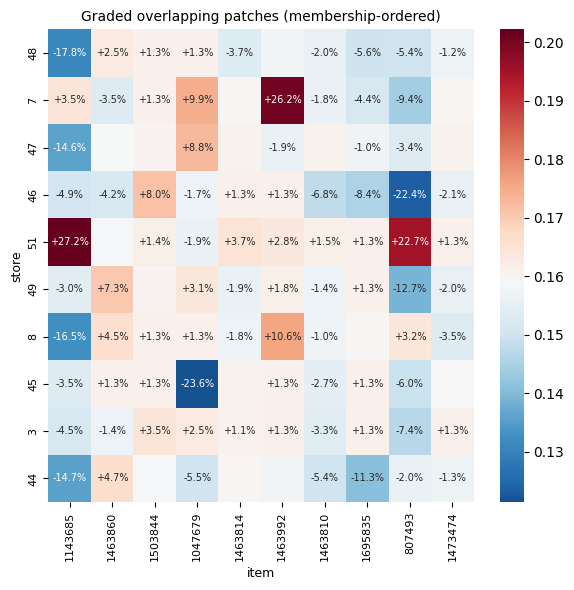

In [34]:
plot_graded_overlapping_patches_df(
    X, d["U"], d["V"],
    cmap="RdBu_r",
)


In [35]:
X

item,807493,1047679,1143685,1463810,1463814,1463860,1463992,1473474,1503844,1695835
store,,,,,,,,,,
3,0.147159,0.162991,0.151782,0.153722,0.160758,0.156719,0.161017,0.161017,0.164501,0.161017
7,0.144068,0.174722,0.164484,0.156023,0.159292,0.153390,0.200583,0.159653,0.161017,0.151959
8,0.164087,0.161017,0.132725,0.157335,0.156145,0.166168,0.175746,0.153344,0.161017,0.159307
44,0.155800,0.150228,0.135578,0.150305,0.159894,0.166377,0.157395,0.156845,0.158575,0.140929
45,0.149440,0.121377,0.153420,0.154592,0.160269,0.161017,0.161017,0.159001,0.161017,0.161017
46,0.123408,0.156183,0.151130,0.148181,0.161017,0.152264,0.161017,0.155569,0.171596,0.145605
47,0.153502,0.172993,0.135800,0.160292,0.160376,0.158889,0.155852,0.160252,0.160090,0.157297
48,0.150306,0.161036,0.130676,0.155722,0.153139,0.162842,0.157744,0.156963,0.161017,0.150082
49,0.138820,0.163944,0.154201,0.156708,0.155888,0.170573,0.161768,0.155709,0.159914,0.161017


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple, Callable
from scipy.cluster.hierarchy import linkage, leaves_list

def _order_by_memberships(M: np.ndarray, method="average", metric="cosine") -> np.ndarray:
    """Return a dendrogram leaf order based only on memberships M."""
    rng = np.random.RandomState(0)
    Z = linkage(M + 1e-9 * rng.randn(*M.shape), method=method, metric=metric, optimal_ordering=True)
    return leaves_list(Z)

def _format_annot_matrix(Xr: np.ndarray, value_fmt: str | Callable[[float], str]) -> np.ndarray:
    """Build string matrix for seaborn annot from Xr."""
    labels = np.empty_like(Xr, dtype=object)
    if callable(value_fmt):
        it = np.nditer(Xr, flags=['multi_index'])
        for x in it:
            i, j = it.multi_index
            v = x.item()
            labels[i, j] = "" if (v is None or (isinstance(v, float) and np.isnan(v))) else value_fmt(v)
    else:
        # string format (e.g., '.3f', '.2%')
        mask = ~np.isnan(Xr)
        labels[:] = ""
        labels[mask] = np.char.mod(f"%{value_fmt}", Xr[mask])
    return labels

def plot_by_store_memberships(
    X_df,          # pandas DataFrame: rows=stores, cols=items
    U: np.ndarray, # (n_rows, R)
    *,
    center: Optional[float] = None,
    cmap: str = "RdBu_r",
    figsize: Tuple[int, int] = (7, 6),
    fontsize: int = 8,
    sort_cols_by_mean_after: bool = False,
    show_values: bool = True,
    value_fmt: str | Callable[[float], str] = ".3f",  # e.g., ".3f" or a callable
):
    """Reorder rows using ONLY store memberships U; columns unchanged (or mean-sorted)."""
    X = X_df.values
    row_names = X_df.index.to_list()
    col_names = X_df.columns.to_list()
    n_rows, n_cols = X.shape
    assert U.shape[0] == n_rows, "U rows must match X_df.index"

    row_order = _order_by_memberships(U)
    Xr = X[row_order, :]

    if sort_cols_by_mean_after:
        col_order = np.argsort(-np.nanmean(Xr, axis=0))  # descending
    else:
        col_order = np.arange(n_cols)

    Xr = Xr[:, col_order]
    if center is None:
        center = np.nanmedian(X) if np.nanmin(X) >= 0 else 0.0

    fig, ax = plt.subplots(figsize=figsize)

    annot = None
    fmt = ""
    if show_values:
        annot = _format_annot_matrix(Xr, value_fmt)
        fmt = ""  # we already formatted strings

    sns.heatmap(
        Xr, cmap=cmap, center=center, cbar=True, ax=ax,
        yticklabels=[str(row_names[i]) for i in row_order],
        xticklabels=[str(col_names[j]) for j in col_order],
        annot=annot, fmt=fmt, annot_kws={"fontsize": max(6, fontsize-1)}
    )
    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_ylabel("store", fontsize=fontsize+1)
    ax.set_xlabel("item",  fontsize=fontsize+1)
    ax.set_title("Heatmap ordered by STORE memberships (rows only)", fontsize=fontsize+2)
    plt.tight_layout()
    return fig, ax, (row_order, col_order)

def plot_by_item_memberships(
    X_df,          # pandas DataFrame: rows=stores, cols=items
    V: np.ndarray, # (n_cols, C)
    *,
    center: Optional[float] = None,
    cmap: str = "RdBu_r",
    figsize: Tuple[int, int] = (7, 6),
    fontsize: int = 8,
    sort_rows_by_mean_after: bool = False,
    show_values: bool = True,
    value_fmt: str | Callable[[float], str] = ".3f",
):
    """Reorder columns using ONLY item memberships V; rows unchanged (or mean-sorted)."""
    X = X_df.values
    row_names = X_df.index.to_list()
    col_names = X_df.columns.to_list()
    n_rows, n_cols = X.shape
    assert V.shape[0] == n_cols, "V rows must match X_df.columns"

    col_order = _order_by_memberships(V)
    Xr = X[:, col_order]

    if sort_rows_by_mean_after:
        row_order = np.argsort(-np.nanmean(Xr, axis=1))  # descending
    else:
        row_order = np.arange(n_rows)

    Xr = Xr[row_order, :]
    if center is None:
        center = np.nanmedian(X) if np.nanmin(X) >= 0 else 0.0

    fig, ax = plt.subplots(figsize=figsize)

    annot = None
    fmt = ""
    if show_values:
        annot = _format_annot_matrix(Xr, value_fmt)
        fmt = ""  # we already formatted strings

    sns.heatmap(
        Xr, cmap=cmap, center=center, cbar=True, ax=ax,
        yticklabels=[str(row_names[i]) for i in row_order],
        xticklabels=[str(col_names[j]) for j in col_order],
        annot=annot, fmt=fmt, annot_kws={"fontsize": max(6, fontsize-1)}
    )
    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_ylabel("store", fontsize=fontsize+1)
    ax.set_xlabel("item",  fontsize=fontsize+1)
    ax.set_title("Heatmap ordered by ITEM memberships (columns only)", fontsize=fontsize+2)
    plt.tight_layout()
    return fig, ax, (row_order, col_order)


(<Figure size 700x600 with 2 Axes>,
 <Axes: title={'center': 'Heatmap ordered by STORE memberships (rows only)'}, xlabel='item', ylabel='store'>,
 (array([7, 1, 6, 5, 9, 8, 2, 4, 0, 3], dtype=int32),
  array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])))

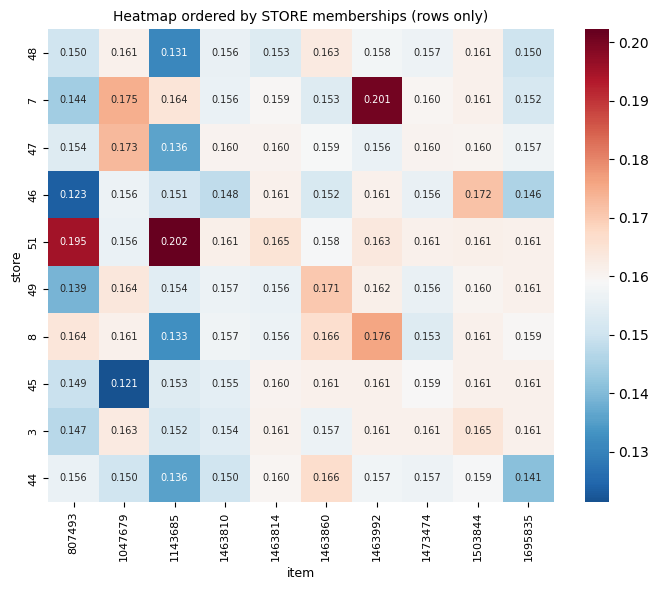

In [12]:
# 1) Reorder by stores only (U); keep columns as-is
plot_by_store_memberships(X, d["U"], show_values=True, value_fmt=".3f")



(<Figure size 700x600 with 2 Axes>,
 <Axes: title={'center': 'Heatmap ordered by ITEM memberships (columns only)'}, xlabel='item', ylabel='store'>,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([2, 5, 8, 1, 4, 6, 3, 9, 0, 7], dtype=int32)))

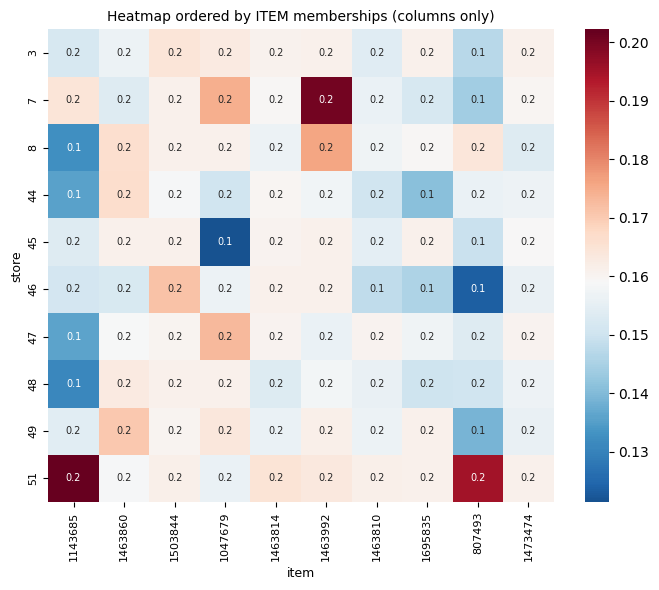

In [15]:
plot_by_item_memberships(X, d["V"], show_values=True, value_fmt=".1f")


In [13]:
X

item,807493,1047679,1143685,1463810,1463814,1463860,1463992,1473474,1503844,1695835
store,,,,,,,,,,
3,0.147159,0.162991,0.151782,0.153722,0.160758,0.156719,0.161017,0.161017,0.164501,0.161017
7,0.144068,0.174722,0.164484,0.156023,0.159292,0.153390,0.200583,0.159653,0.161017,0.151959
8,0.164087,0.161017,0.132725,0.157335,0.156145,0.166168,0.175746,0.153344,0.161017,0.159307
44,0.155800,0.150228,0.135578,0.150305,0.159894,0.166377,0.157395,0.156845,0.158575,0.140929
45,0.149440,0.121377,0.153420,0.154592,0.160269,0.161017,0.161017,0.159001,0.161017,0.161017
46,0.123408,0.156183,0.151130,0.148181,0.161017,0.152264,0.161017,0.155569,0.171596,0.145605
47,0.153502,0.172993,0.135800,0.160292,0.160376,0.158889,0.155852,0.160252,0.160090,0.157297
48,0.150306,0.161036,0.130676,0.155722,0.153139,0.162842,0.157744,0.156963,0.161017,0.150082
49,0.138820,0.163944,0.154201,0.156708,0.155888,0.170573,0.161768,0.155709,0.159914,0.161017


In [ ]:

# 2) Reorder by items only (V); keep rows as-is
fig2, ax2, (row_order2, col_order2) = plot_by_item_memberships(X_df, V)

# (Optional) If you want the “other axis” roughly sorted for readability:
fig1b, ax1b, _ = plot_by_store_memberships(X_df, U, sort_cols_by_mean_after=True)
fig2b, ax2b, _ = plot_by_item_memberships(X_df, V, sort_rows_by_mean_after=True)


In [13]:
df_weekly.to_csv("../output/data/20250707_train_top_51_store_100_item_weekly.csv", index=False)

/Users/yvesgreatti/.pyenv/versions/retail/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/retail/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


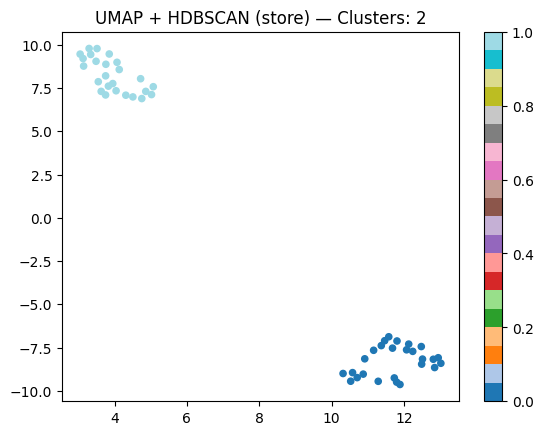

/Users/yvesgreatti/.pyenv/versions/retail/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/retail/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


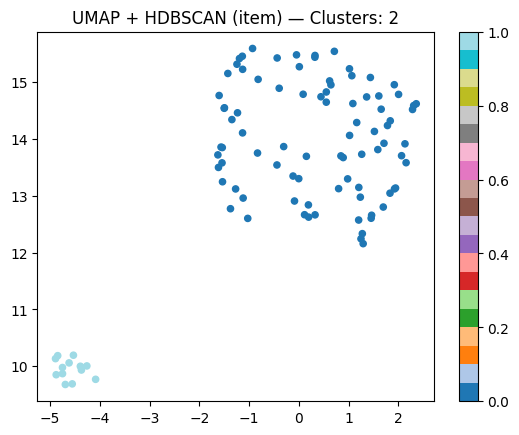

In [14]:
def plot_umap_hdbscan(X, title="UMAP + HDBSCAN", axis_label="row", n_neighbors=10, min_dist=0.1, min_cluster_size=15):
    embedding = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42).fit_transform(X)
    clusterer = HDBSCAN(min_cluster_size=min_cluster_size).fit(embedding)
    
    labels = clusterer.labels_
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap="tab20", s=20)
    plt.title(f"{title} ({axis_label}) — Clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")
    plt.colorbar()
    plt.show()

plot_umap_hdbscan(df_weekly.values, title="UMAP + HDBSCAN", axis_label="store", n_neighbors=10, min_dist=0.1, min_cluster_size=15)
plot_umap_hdbscan(df_weekly.values.T, title="UMAP + HDBSCAN", axis_label="item", n_neighbors=15, min_dist=0.01, min_cluster_size=5)

In [13]:
cluster_result = compute_biclustering_scores(
    data=df_weekly.values,
    model_class=SpectralBiclustering,
    row_range=range(2, 5),
    col_range=range(2, 5),
    true_row_labels=None,
    model_kwargs=None,
    return_models=True,
)
cluster_result

2025-07-10 07:36:34,346 - INFO - Evaluating n_row=2, n_col=2


2025-07-10 07:36:34,772 - INFO - Evaluating n_row=2, n_col=3
2025-07-10 07:36:34,914 - INFO - Evaluating n_row=2, n_col=4
2025-07-10 07:36:35,068 - INFO - Evaluating n_row=3, n_col=2
2025-07-10 07:36:35,239 - INFO - Evaluating n_row=3, n_col=3
2025-07-10 07:36:35,460 - INFO - Evaluating n_row=3, n_col=4
2025-07-10 07:36:35,676 - INFO - Evaluating n_row=4, n_col=2
2025-07-10 07:36:35,864 - INFO - Evaluating n_row=4, n_col=3
2025-07-10 07:36:36,045 - INFO - Evaluating n_row=4, n_col=4


,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI,row_labels,col_labels,model
0,2,2,10.350624,0.111467,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(2, 2), random..."
1,2,3,58.158237,0.486451,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(2, 3), random..."
2,2,4,58.158237,0.486451,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 0, 1, 1, ...","SpectralBiclustering(n_clusters=(2, 4), random..."
3,3,2,33.006999,0.210395,NaN,"[2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(3, 2), random..."
4,3,3,62.769398,0.327955,NaN,"[2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(3, 3), random..."
5,3,4,62.769398,0.327955,NaN,"[2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(3, 4), random..."
6,4,2,39.480521,0.164168,NaN,"[2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(4, 2), random..."
7,4,3,65.314081,0.145081,NaN,"[2, 2, 2, 2, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(4, 3), random..."
8,4,4,65.314081,0.145081,NaN,"[2, 2, 2, 2, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, ...","[2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, ...","SpectralBiclustering(n_clusters=(4, 4), random..."


In [3]:
cluster_result = pd.read_csv("../output/data/20250711_train_top_300_item_sales_cluster.csv")
cluster_result.head()


,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI,row_labels,col_labels,model
0,10,10,73.615663,0.092342,NaN,[9 4 4 4 8 4 0 9 7 1 7 1 1 1 1 1 1 7 1 7 1 1 8...,[4 8 8 8 6 1 3 8 8 0 8 4 8 2 6 9 8 8 3 9 9 8 8...,"SpectralBiclustering(n_clusters=(10, 10), rand..."
1,10,11,75.344966,0.109176,NaN,[9 9 0 9 4 2 0 0 8 7 8 7 7 7 7 7 7 3 7 8 3 1 9...,[ 1 6 6 6 8 2 9 6 6 6 6 1 6 4 8 ...,"SpectralBiclustering(n_clusters=(10, 11), rand..."
2,10,12,75.344966,0.109176,NaN,[9 9 0 9 4 2 0 0 8 7 8 7 7 7 7 7 7 3 7 8 3 1 9...,[ 1 6 6 6 4 10 0 6 6 6 6 1 6 5 4 ...,"SpectralBiclustering(n_clusters=(10, 12), rand..."
3,10,13,72.915441,0.069842,NaN,[0 0 0 5 5 9 0 0 8 8 8 1 8 1 1 1 8 1 1 8 1 1 5...,[ 0 6 6 6 5 4 1 6 6 6 6 0 6 7 5 ...,"SpectralBiclustering(n_clusters=(10, 13), rand..."
4,10,14,72.915441,0.069842,NaN,[0 0 0 5 5 9 0 0 8 8 8 1 8 1 1 1 8 1 1 8 1 1 5...,[ 7 0 4 4 9 5 1 4 0 4 4 7 4 3 9 ...,"SpectralBiclustering(n_clusters=(10, 14), rand..."


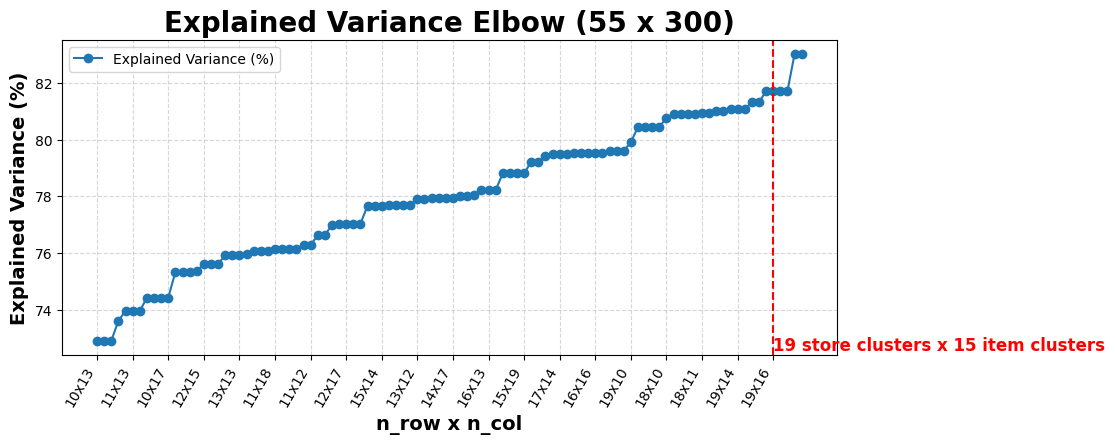

,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI,row_labels,col_labels,model,label
0,10,13,72.915441,0.069842,NaN,[0 0 0 5 5 9 0 0 8 8 8 1 8 1 1 1 8 1 1 8 1 1 5...,[ 0 6 6 6 5 4 1 6 6 6 6 0 6 7 5 ...,"SpectralBiclustering(n_clusters=(10, 13), rand...",10x13
1,10,14,72.915441,0.069842,NaN,[0 0 0 5 5 9 0 0 8 8 8 1 8 1 1 1 8 1 1 8 1 1 5...,[ 7 0 4 4 9 5 1 4 0 4 4 7 4 3 9 ...,"SpectralBiclustering(n_clusters=(10, 14), rand...",10x14
2,10,15,72.915441,0.069842,NaN,[0 0 0 5 5 9 0 0 8 8 8 1 8 1 1 1 8 1 1 8 1 1 5...,[ 9 9 0 0 12 3 5 0 0 0 0 9 0 7 12 ...,"SpectralBiclustering(n_clusters=(10, 15), rand...",10x15
3,10,10,73.615663,0.092342,NaN,[9 4 4 4 8 4 0 9 7 1 7 1 1 1 1 1 1 7 1 7 1 1 8...,[4 8 8 8 6 1 3 8 8 0 8 4 8 2 6 9 8 8 3 9 9 8 8...,"SpectralBiclustering(n_clusters=(10, 10), rand...",10x10
4,11,14,73.962455,0.061092,NaN,[ 5 5 5 6 6 0 5 5 3 3 3 3 3 3 3 ...,[ 7 0 4 4 9 5 1 4 0 4 4 7 4 3 9 ...,"SpectralBiclustering(n_clusters=(11, 14), rand...",11x14
...,...,...,...,...,...,...,...,...,...
95,19,16,81.710887,0.043603,NaN,[ 1 1 14 18 9 18 3 3 8 10 8 10 10 10 10 ...,[10 0 0 0 11 14 6 0 7 0 0 10 0 3 4 ...,"SpectralBiclustering(n_clusters=(19, 16), rand...",19x16
96,19,18,81.710887,0.043603,NaN,[ 1 1 14 18 9 18 3 3 8 10 8 10 10 10 10 ...,[ 1 17 17 7 2 12 6 17 3 7 7 1 7 10 2 ...,"SpectralBiclustering(n_clusters=(19, 18), rand...",19x18
97,19,19,81.710887,0.043603,NaN,[ 1 1 14 18 9 18 3 3 8 10 8 10 10 10 10 ...,[12 16 12 4 17 18 6 4 0 4 4 12 4 5 8 ...,"SpectralBiclustering(n_clusters=(19, 19), rand...",19x19
98,19,11,83.014641,0.062627,NaN,[18 18 10 18 9 4 10 10 0 3 0 3 3 3 3 ...,[ 1 6 6 6 8 2 9 6 6 6 6 1 6 4 8 ...,"SpectralBiclustering(n_clusters=(19, 11), rand...",19x11


In [20]:
plot_biclustering_elbows(
    cluster_result,
    metric="Explained Variance (%)",
    vline_index=95,
    vline_text="19 store clusters x 15 item clusters",
    title="Explained Variance Elbow (55 x 300)",
    fn="../output/figures/20250711_biclustering_elbows_explained_variance_55_stores_300_items.tiff",
)

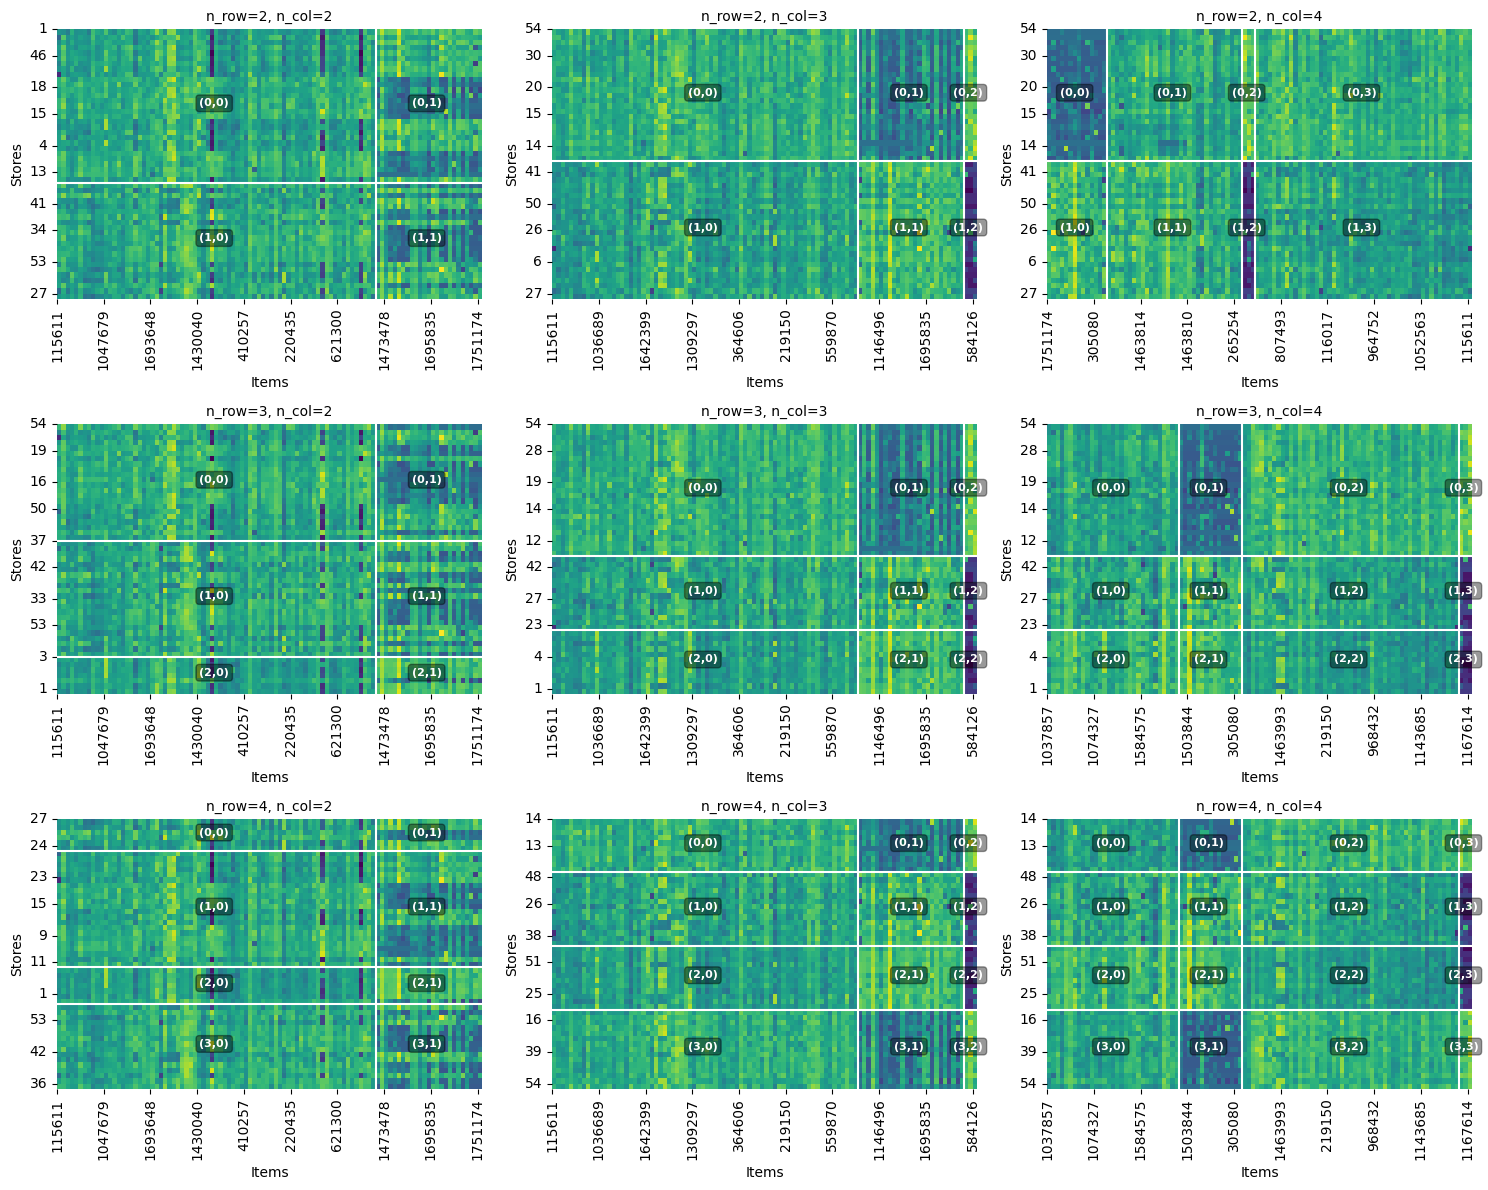

In [15]:
plot_bicluster_heatmaps_grid(df_weekly, 
                             cluster_result, 
                             heatmaps_per_row=3,
                             figsize_per_heatmap=(5, 4),
                             show_tick_labels=True,
                             fn="../output/figures/20250710_biclustering_heatmaps_51_stores_100_items.tiff")


In [16]:
cluster_result.to_csv("../output/data/20250710_spectral_cluster_df.csv", index=False)

In [17]:
# Select the best clustering result
best_idx = cluster_result["Explained Variance (%)"].idxmax()
best_row = cluster_result.loc[best_idx]
best_model = best_row["model"]

store_labels = best_model.row_labels_
item_labels = best_model.column_labels_
n_row_clusters = best_row["n_row"]
n_col_clusters = best_row["n_col"]

# Map cluster labels to actual store and item IDs
store_ids = df_weekly.index.tolist()
item_ids = df_weekly.columns.tolist()

store_cluster_map = dict(zip(store_ids, store_labels))
item_cluster_map = dict(zip(item_ids, item_labels))

# Apply to original DataFrame
df["store_cluster"] = df["store"].map(store_cluster_map)
df["item_cluster"] = df["item"].map(item_cluster_map)
df["cluster"] = df["store_cluster"].astype(int).astype(str) + "_" + df["item_cluster"].astype(int).astype(str)

# # Optional: Drop any unmatched entries
# df_raw = df_raw.dropna(subset=["cluster"])


In [18]:
df.head()

,date,store_item,store,item,unit_sales,id,onpromotion,store_cluster,item_cluster,cluster
365,2014-01-02,44_1503844,44,1503844,966.148987,16377457.0,NaN,2,1,2_1
366,2014-01-03,44_1503844,44,1503844,663.405029,16442863.0,NaN,2,1,2_1
367,2014-01-04,44_1503844,44,1503844,1075.000000,16511061.0,NaN,2,1,2_1
368,2014-01-05,44_1503844,44,1503844,892.607971,16578789.0,NaN,2,1,2_1
369,2014-01-06,44_1503844,44,1503844,261.553986,16642520.0,NaN,2,1,2_1


In [21]:
df.to_csv("../output/data/20250710_train_top_51_store_100_item_clusters.csv", index=False)

In [19]:
df.groupby("store")["item_cluster"].nunique()

store
1     2
2     3
3     3
4     2
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
23    3
24    3
25    2
26    3
27    3
28    3
29    3
30    3
31    3
33    3
34    3
35    3
36    3
37    3
38    2
39    3
40    3
41    3
42    2
43    3
44    3
45    3
46    3
47    3
48    2
49    2
50    2
51    3
53    2
54    3
Name: item_cluster, dtype: int64

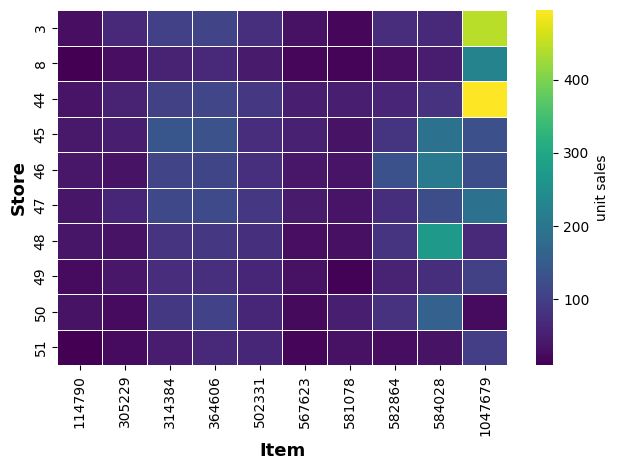

In [37]:
ax = sns.heatmap(
    store_item_matrix,
    cmap="viridis",
    linewidths=.5,          # thin separator lines
    linecolor="white",
cbar_kws={"label": "unit sales"}
)

#ax.set_xticklabels(day_names, rotation=0, fontsize=11)
ax.set_xlabel("Item", fontsize=13, fontweight="bold")
ax.set_ylabel("Store",       fontsize=13, fontweight="bold")

plt.tight_layout()

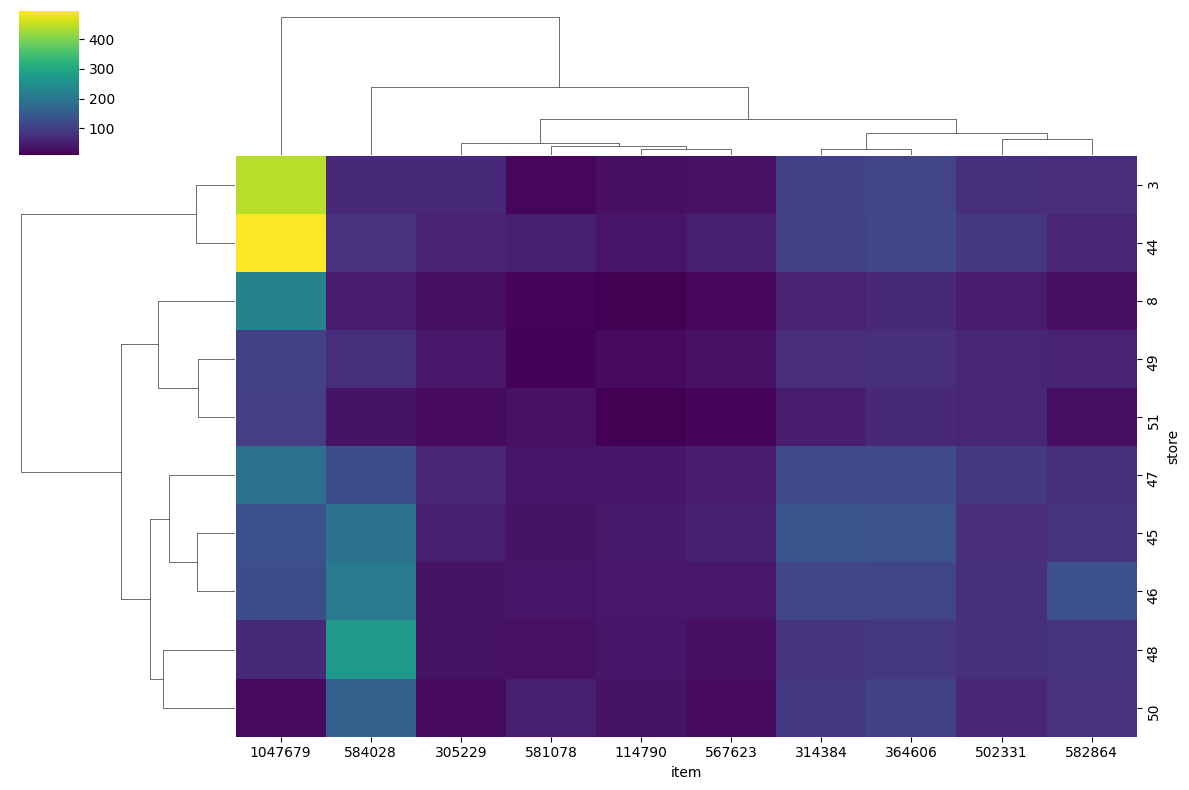

In [38]:
sns.clustermap(store_item_matrix, cmap='viridis', figsize=(12, 8))


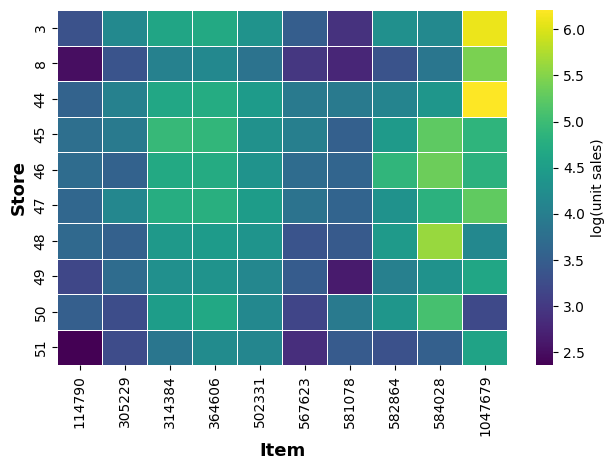

In [39]:
matrix_log = np.log1p(store_item_matrix)
ax = sns.heatmap(
    matrix_log,
    cmap="viridis",
    linewidths=.5,          # thin separator lines
    linecolor="white",
cbar_kws={"label": "log(unit sales)"}
)

#ax.set_xticklabels(day_names, rotation=0, fontsize=11)
ax.set_xlabel("Item", fontsize=13, fontweight="bold")
ax.set_ylabel("Store",  fontsize=13, fontweight="bold")

plt.tight_layout()


<Axes: xlabel='item', ylabel='store'>

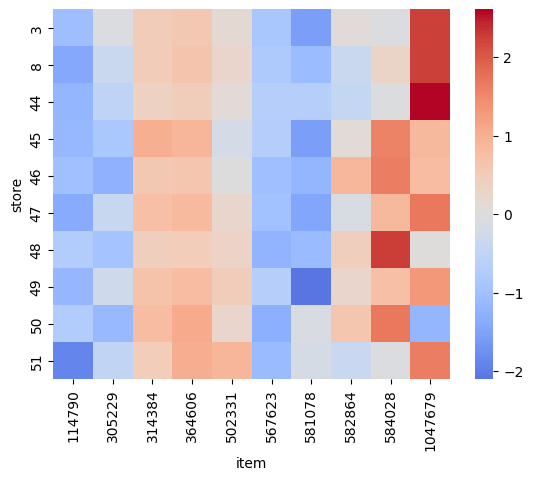

In [40]:
from scipy.stats import zscore

# Normalize each store’s sales profile across items
matrix_norm = matrix_log.apply(zscore, axis=1)  # axis=1 → row-wise
sns.heatmap(matrix_norm, cmap='coolwarm', center=0)

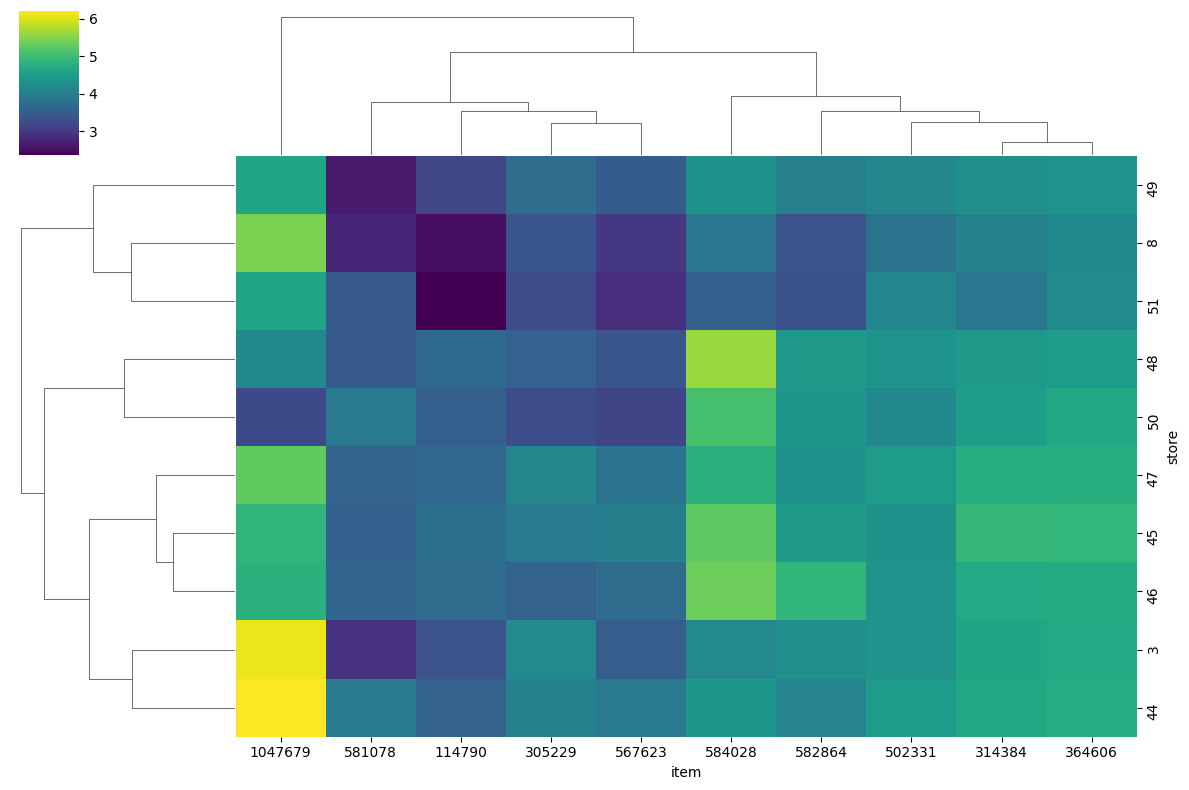

In [41]:
sns.clustermap(matrix_log, cmap='viridis', figsize=(12, 8))


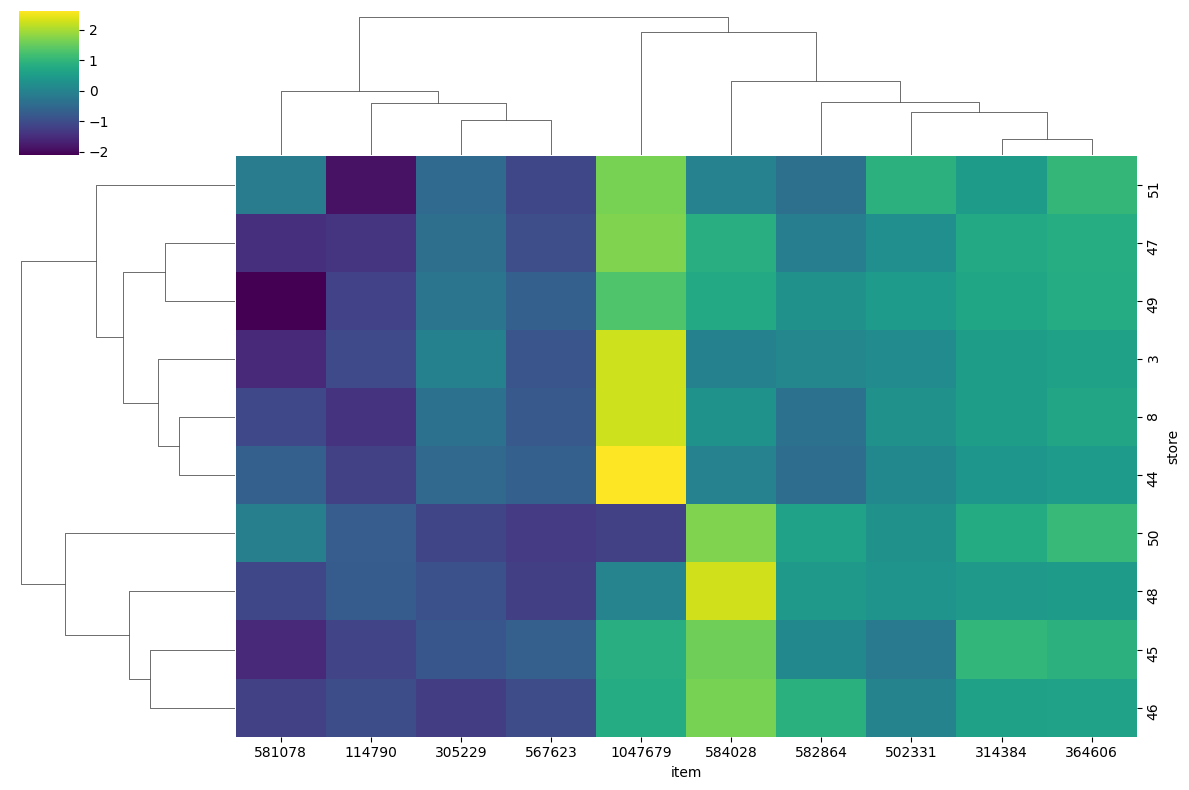

In [42]:
sns.clustermap(matrix_norm, cmap='viridis', figsize=(12, 8))


In [43]:
model = SpectralBiclustering(n_clusters=5, method='log', random_state=0)
model.fit(store_item_matrix)

SpectralBiclustering(method='log', n_clusters=5, random_state=0)

In [44]:
# Get reordered indices
row_order = np.argsort(model.row_labels_)
col_order = np.argsort(model.column_labels_)

# Reorder the matrix
matrix_ordered = store_item_matrix.iloc[row_order, col_order]

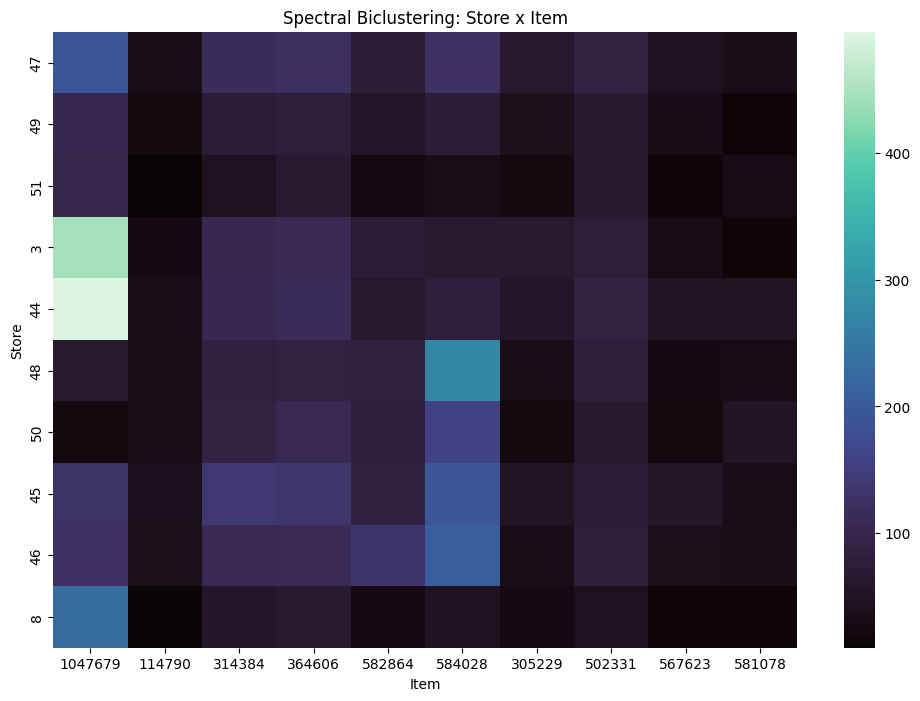

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(matrix_ordered, cmap='mako')
plt.title("Spectral Biclustering: Store x Item")
plt.xlabel("Item")
plt.ylabel("Store")
plt.show()


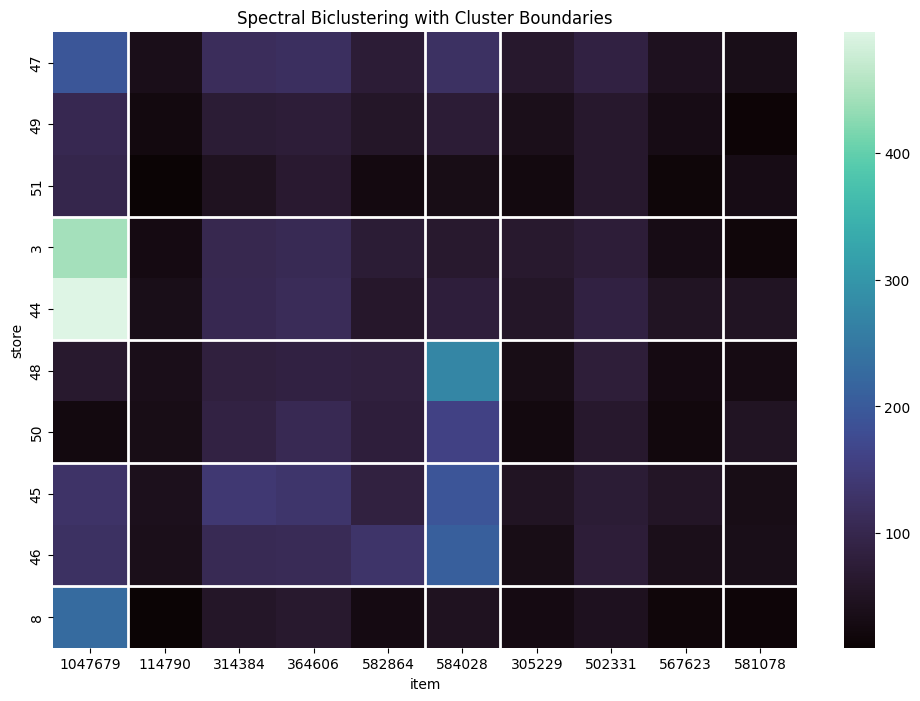

In [46]:
import numpy as np

# Number of row/col clusters
n_row_clusters = len(set(model.row_labels_))
n_col_clusters = len(set(model.column_labels_))

# Row/Col boundaries
row_cuts = [np.where(np.diff(np.sort(model.row_labels_)) != 0)[0] + 1]
col_cuts = [np.where(np.diff(np.sort(model.column_labels_)) != 0)[0] + 1]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_ordered, cmap='mako', cbar=True)

for r in row_cuts[0]:
    plt.axhline(r, color='white', linewidth=2)
for c in col_cuts[0]:
    plt.axvline(c, color='white', linewidth=2)

plt.title("Spectral Biclustering with Cluster Boundaries")
plt.show()


In [47]:
model = SpectralBiclustering(n_clusters=7, method='log', random_state=0)
model.fit(matrix_norm)

SpectralBiclustering(method='log', n_clusters=7, random_state=0)

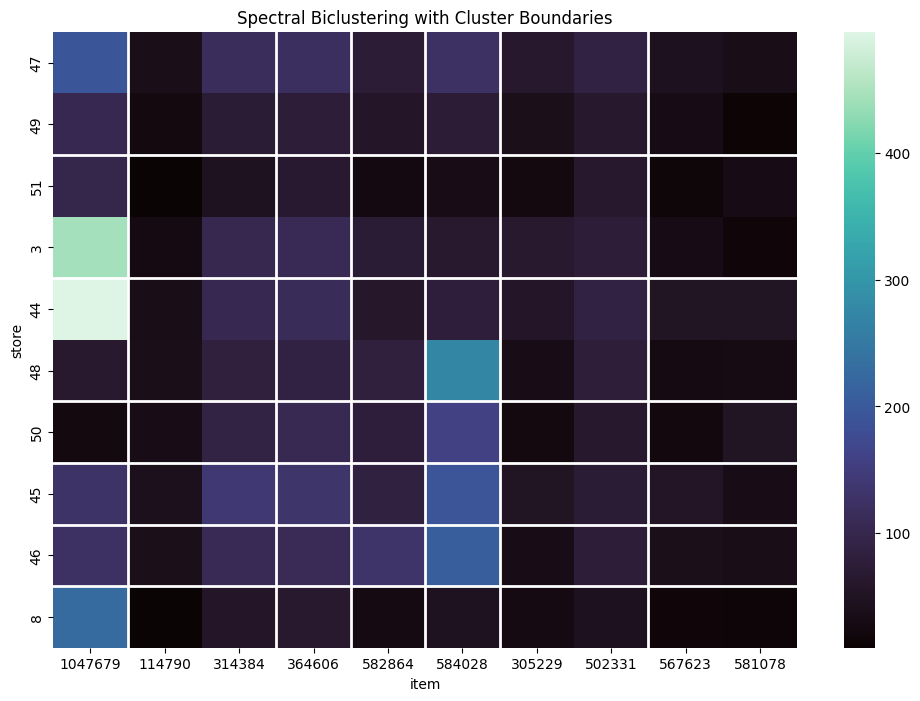

In [48]:
# Number of row/col clusters
n_row_clusters = len(set(model.row_labels_))
n_col_clusters = len(set(model.column_labels_))

# Row/Col boundaries
row_cuts = [np.where(np.diff(np.sort(model.row_labels_)) != 0)[0] + 1]
col_cuts = [np.where(np.diff(np.sort(model.column_labels_)) != 0)[0] + 1]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_ordered, cmap='mako', cbar=True)

for r in row_cuts[0]:
    plt.axhline(r, color='white', linewidth=2)
for c in col_cuts[0]:
    plt.axvline(c, color='white', linewidth=2)

plt.title("Spectral Biclustering with Cluster Boundaries")
plt.show()

In [58]:
model = GeneralizedDoubleKMeans(n_row_clusters=5, n_col_clusters_list=[5] * 5, random_state=0)
X_np = np.random.poisson(5, (10, 8))  # Placeholder in case store_item_matrix is unavailable here
model.fit(X_np)

ValueError: All column cluster blocks are empty or malformed.

In [62]:
X_debug = np.random.poisson(5, (10, 25))  # 10 stores, 25 items

U_dbg, V_list_dbg, C_blocks_dbg, loss_dbg = generalized_double_kmeans(
    X_debug,
    P=5,
    Q_list=[5] * 5,  # One Qp per row cluster
    max_iter=100,
    tol=1e-4,
    random_state=0
)

[(Vp.shape, Vp.ndim) for Vp in V_list_dbg]


[((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1),
 ((25,), 1)]

In [57]:
model = GeneralizedDoubleKMeans(n_row_clusters=5, n_col_clusters_list=[3] * 3, random_state=0)
model.fit(store_item_matrix.values)

IndexError: list index out of range

In [12]:

# Example: aggregate by dayofweek
store_clust_df = df.groupby(["store", "dayofweek"])["unit_sales"].sum().unstack(fill_value=0)
store_clust_df

KeyError: 'dayofweek'

In [8]:
X, pivot_clean = preprocess_sales_matrix(store_clust_df, log_transform=True, smooth_window=16, zscore_rows=True)

/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/utils.py:421: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df = df.rolling(window=smooth_window, axis=1, min_periods=1).mean()


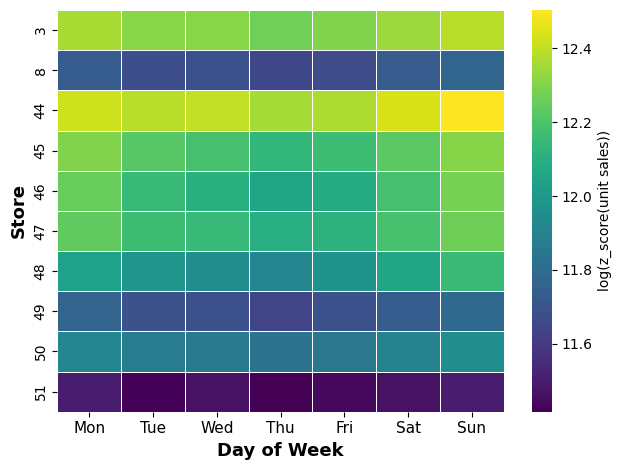

In [9]:

day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
norm = plt.Normalize(vmin=pivot_clean.values.min(),
                     vmax=pivot_clean.values.max())


ax = sns.heatmap(
    pivot_clean,
    cmap="viridis",
    linewidths=.5,          # thin separator lines
    linecolor="white",
cbar_kws={"label": "log(z_score(unit sales))"}
)

ax.set_xticklabels(day_names, rotation=0, fontsize=11)
ax.set_xlabel("Day of Week", fontsize=13, fontweight="bold")
ax.set_ylabel("Store",       fontsize=13, fontweight="bold")

plt.tight_layout()
fn = "../output/figures/2025-06-07_heatmap_store_sales_matrix.tiff"
plt.savefig(fn, dpi=300)
plt.show()
plt.close()



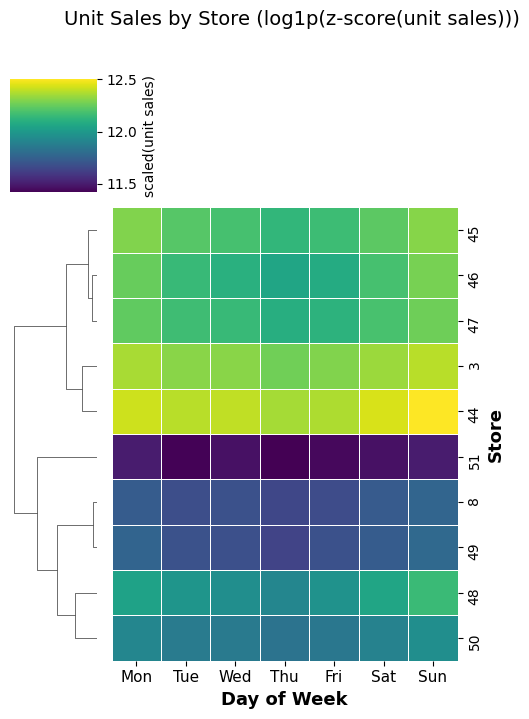

In [19]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# ---------------------------------------------------------------------
# build the clustermap
# ---------------------------------------------------------------------
grid = sns.clustermap(
    pivot_clean,
    cmap="viridis",
    row_cluster=True,
    col_cluster=False,          # keep Mon→Sun order
    linewidths=.4, linecolor="white",
    figsize=(6, 7),
  #      cbar_pos=(0.90, 0.20, 0.03, 0.65),   # [x, y, width, height]
    cbar_kws={
        "label": "scaled(unit sales)",
        "orientation": "vertical",   # just to be explicit
    }
)

# tidy up the heat‑map axis
ax = grid.ax_heatmap
ax.set_xticklabels(day_names, rotation=0, fontsize=11)
ax.set_xlabel("Day of Week",  fontsize=13, fontweight="bold")
ax.set_ylabel("Store",        fontsize=13, fontweight="bold")

# overall title (use the figure, not the heat‑map axis)
grid.figure.suptitle(
    "Unit Sales by Store (log1p(z‑score(unit sales)))",
    fontsize=14, y=1.02
)

# ---------------------------------------------------------------------
# FIRST let matplotlib tighten up everything *else* …
# ---------------------------------------------------------------------
#grid.figure.tight_layout(rect=[0, 0, 0.88, 1])     # leave room on the right

# ---------------------------------------------------------------------
# … THEN move / resize the colour‑bar
# ---------------------------------------------------------------------

# optional: put tick labels on the outside
#grid.cax.yaxis.set_label_position('right')
grid.cax.yaxis.tick_right()
grid.figure.tight_layout(rect=[0, 0, 0.88, 1])

# ---------------------------------------------------------------------
# save / show
# ---------------------------------------------------------------------
fn = "../output/figures/2025-06-07_clustered_store_sales_matrix.tiff"
grid.figure.savefig(fn, dpi=300    )
plt.show()
plt.close()


In [25]:
results_spectral_clustering = compute_spectral_clustering_cv_scores(
    data=pivot_clean.values,
    model_class=SpectralClustering,
    n_clusters_row_range=range(2, 8),
    cv_folds=3
)
results_spectral_clustering

Evaluating n_row=2
Evaluating n_row=3
Evaluating n_row=4
Evaluating n_row=5
Evaluating n_row=6


/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-p

,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI
0,2,NaN,42.022753,0.541314,NaN
1,3,NaN,58.289140,0.225026,NaN
2,4,NaN,79.633059,0.458693,NaN
3,5,NaN,78.637807,0.458693,NaN
4,6,NaN,83.910748,0.445367,NaN


In [21]:
results_spectral_biclustering = compute_spectral_clustering_cv_scores(
    data=pivot_clean.values,
    model_class=SpectralBiclustering,
    n_clusters_row_range=range(2, 8),  
    cv_folds=3
)
results_spectral_biclustering

Evaluating n_row=2
Evaluating n_row=3
Evaluating n_row=4
Evaluating n_row=5
Evaluating n_row=6


,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI
0,2,NaN,63.539831,0.541314,NaN
1,3,NaN,55.149080,0.392015,NaN
2,4,NaN,67.576050,0.392015,NaN
3,5,NaN,75.310768,0.177420,NaN
4,6,NaN,84.248961,0.458693,NaN


In [28]:
results_spectral_coclustering = compute_spectral_clustering_cv_scores(
    data=pivot_clean.values,
    model_class=SpectralCoclustering,
    n_clusters_row_range=range(2, 8),  
    cv_folds=3
)
results_spectral_coclustering

Evaluating n_row=2
Evaluating n_row=3
Evaluating n_row=4
Evaluating n_row=5
Evaluating n_row=6


,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI
0,2,NaN,36.404406,0.541314,NaN
1,3,NaN,51.316306,0.541314,NaN
2,4,NaN,52.517374,0.177420,NaN
3,5,NaN,88.013466,0.445367,NaN
4,6,NaN,91.179629,0.445367,NaN


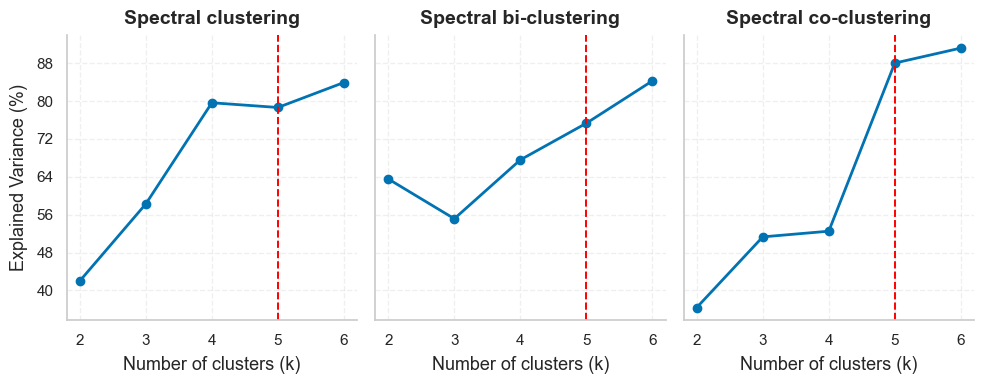

In [35]:
plot_spectral_clustering_elbows([results_spectral_clustering, results_spectral_biclustering, results_spectral_coclustering], 
                                titles=["Spectral clustering", 
                                        "Spectral bi-clustering", 
                                        "Spectral co-clustering"], 
                                vline_x=5,
                                fn="../output/figures/20250610_store_spectral_clustering_elbow.tiff")

In [36]:
store_clusters = generate_store_item_clusters(pivot_clean, n_clusters=5, model_class=SpectralClustering)
store_clusters

,store_item,clusterId
0,3,3
1,8,1
2,44,3
3,45,2
4,46,2
5,47,4
6,48,0
7,49,1
8,50,0
9,51,1


In [52]:
store_clusters.to_excel("../output/data/20250610_store_clusters.xlsx", index=False)


In [39]:
item_clust_df = df.groupby(["item", "dayofweek"])["unit_sales"].sum().unstack(fill_value=0)
item_clust_df

dayofweek,0,1,2,3,4,5,6
item,,,,,,,
114790,65934.00000,58541.000000,61027.000000,49694.000000,59724.00000,92168.000000,104334.000000
305229,100526.00000,87752.000000,96594.000000,77143.000000,94014.00000,113315.000000,126298.000000
314384,208535.00000,178413.000000,187639.000000,148368.000000,181779.00000,286893.000000,331265.000000
364606,233280.00000,206453.000000,218815.000000,177461.000000,195605.00000,278954.000000,326067.000000
502331,174052.00000,139167.000000,140516.000000,118401.000000,136309.00000,200200.000000,269012.000000
567623,80895.00000,65895.000000,66624.000000,52940.000000,61229.00000,100220.000000,135745.000000
581078,70016.00000,64095.000000,71520.000000,58879.000000,71888.00000,88769.000000,92420.000000
582864,148046.03125,131828.734375,130798.570312,123210.703125,262692.65625,173113.109375,183678.265625
584028,291425.68750,257868.406250,257720.062500,234997.234375,334694.56250,342394.843750,372661.968750


In [40]:
X, pivot_clean = preprocess_sales_matrix(item_clust_df, log_transform=True, smooth_window=16, zscore_rows=True)

/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/utils.py:421: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df = df.rolling(window=smooth_window, axis=1, min_periods=1).mean()


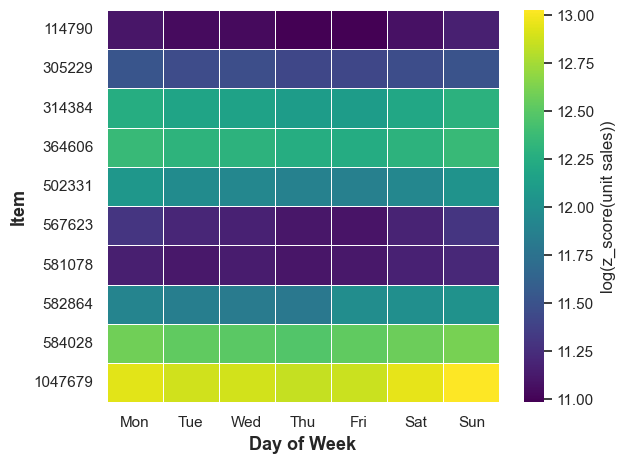

In [41]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
norm = plt.Normalize(vmin=pivot_clean.values.min(),
                     vmax=pivot_clean.values.max())


ax = sns.heatmap(
    pivot_clean,
    cmap="viridis",
    linewidths=.5,          # thin separator lines
    linecolor="white",
cbar_kws={"label": "log(z_score(unit sales))"}
)

ax.set_xticklabels(day_names, rotation=0, fontsize=11)
ax.set_xlabel("Day of Week", fontsize=13, fontweight="bold")
ax.set_ylabel("Item",       fontsize=13, fontweight="bold")

plt.tight_layout()
fn = "../output/figures/20250610_heatmap_item_sales_matrix.tiff"
plt.savefig(fn, dpi=300)
plt.show()
plt.close()

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_17412/3335997768.py:34: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  grid.figure.tight_layout(rect=[0, 0, 0.88, 1])
/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_17412/3335997768.py:40: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  grid.figure.savefig(fn, dpi=300    )
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


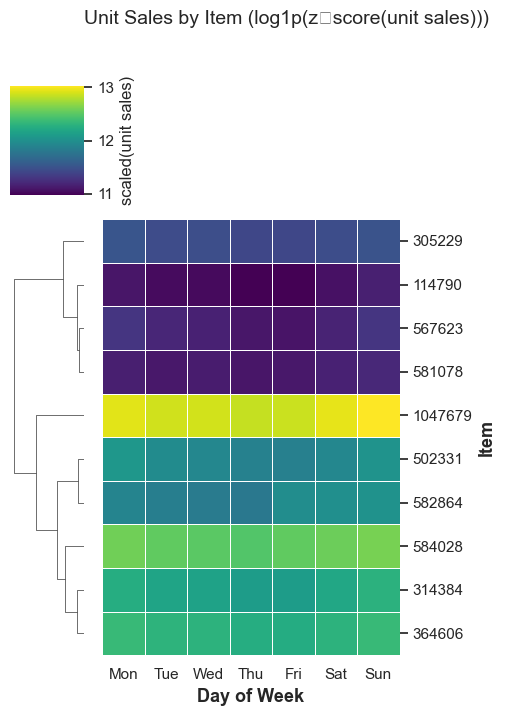

In [42]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# ---------------------------------------------------------------------
# build the clustermap
# ---------------------------------------------------------------------
grid = sns.clustermap(
    pivot_clean,
    cmap="viridis",
    row_cluster=True,
    col_cluster=False,          # keep Mon→Sun order
    linewidths=.4, linecolor="white",
    figsize=(6, 7),
  #      cbar_pos=(0.90, 0.20, 0.03, 0.65),   # [x, y, width, height]
    cbar_kws={
        "label": "scaled(unit sales)",
        "orientation": "vertical",   # just to be explicit
    }
)

# tidy up the heat‑map axis
ax = grid.ax_heatmap
ax.set_xticklabels(day_names, rotation=0, fontsize=11)
ax.set_xlabel("Day of Week",  fontsize=13, fontweight="bold")
ax.set_ylabel("Item",        fontsize=13, fontweight="bold")

# overall title (use the figure, not the heat‑map axis)
grid.figure.suptitle(
    "Unit Sales by Item (log1p(z‑score(unit sales)))",
    fontsize=14, y=1.02
)


grid.cax.yaxis.tick_right()
grid.figure.tight_layout(rect=[0, 0, 0.88, 1])

# ---------------------------------------------------------------------
# save / show
# ---------------------------------------------------------------------
fn = "../output/figures/20250610_clustered_item_sales_matrix.tiff"
grid.figure.savefig(fn, dpi=300    )
plt.show()
plt.close()


In [44]:
results_spectral_clustering = compute_spectral_clustering_cv_scores(
    data=pivot_clean.values,
    model_class=SpectralClustering,
    n_clusters_row_range=range(2, 8),
    cv_folds=3
)
results_spectral_clustering

Evaluating n_row=2
Evaluating n_row=3
Evaluating n_row=4


/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-p

Evaluating n_row=5
Evaluating n_row=6


/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:372: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  _, diffusion_map = eigsh(
/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:703: UserWarning:

,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI
0,2,NaN,59.052952,0.502932,NaN
1,3,NaN,86.294428,0.297913,NaN
2,4,NaN,88.017222,0.482839,NaN
3,5,NaN,90.963996,0.514127,NaN
4,6,NaN,91.246928,0.514127,NaN


In [45]:
results_spectral_biclustering = compute_spectral_clustering_cv_scores(
    data=pivot_clean.values,
    model_class=SpectralBiclustering,
    n_clusters_row_range=range(2, 7),  
    cv_folds=3
)
results_spectral_biclustering

Evaluating n_row=2
Evaluating n_row=3
Evaluating n_row=4
Evaluating n_row=5
Evaluating n_row=6


,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI
0,2,NaN,29.414937,0.502932,NaN
1,3,NaN,50.118215,0.585602,NaN
2,4,NaN,82.861211,0.585602,NaN
3,5,NaN,87.247744,0.236738,NaN
4,6,NaN,87.247744,0.236738,NaN


In [46]:
results_spectral_coclustering = compute_spectral_clustering_cv_scores(
    data=pivot_clean.values,
    model_class=SpectralCoclustering,
    n_clusters_row_range=range(2, 8),  
    cv_folds=3
)
results_spectral_coclustering

Evaluating n_row=2
Evaluating n_row=3
Evaluating n_row=4
Evaluating n_row=5
Evaluating n_row=6


,n_row,n_col,Explained Variance (%),Mean Silhouette,Mean ARI
0,2,NaN,13.132559,0.248948,NaN
1,3,NaN,29.572957,0.502932,NaN
2,4,NaN,31.210978,0.502932,NaN
3,5,NaN,79.531610,0.514127,NaN
4,6,NaN,93.000911,0.585602,NaN


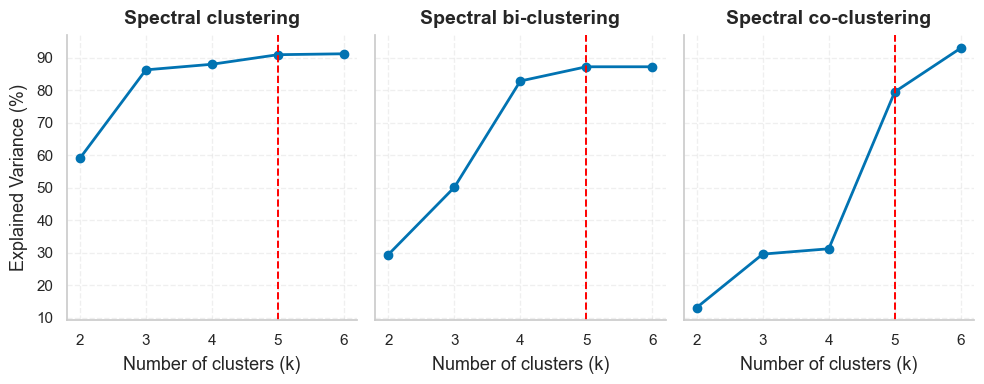

In [48]:
plot_spectral_clustering_elbows([results_spectral_clustering, results_spectral_biclustering, results_spectral_coclustering], 
                                titles=["Spectral clustering", 
                                        "Spectral bi-clustering", 
                                        "Spectral co-clustering"], 
                                vline_x=5,
                                fn="../output/figures/20250610_item_spectral_clustering_elbow.tiff")

In [49]:
item_clusters = generate_store_item_clusters(pivot_clean, n_clusters=4, model_class=SpectralClustering)
item_clusters

,store_item,clusterId
0,114790,1
1,305229,3
2,314384,2
3,364606,2
4,502331,3
5,567623,1
6,581078,1
7,582864,3
8,584028,2
9,1047679,0


In [50]:
item_clusters.to_excel("../output/data/20250610_item_clusters.xlsx", index=False)

In [ ]:
results_df = compute_gdkm_cv_scores(
    X,
    P_range=range(20, 30),   # Try 2 to 7 row clusters
    Q_range=range(20, 30),   # Try 2 to 7 column clusters
    cv_folds=3             # 3-fold CV
)

In [23]:
# With BIC-like penalty (favors simpler models)
best_pq, best_score = suggest_optimal_pq(results_df, criterion='bic', penalty_lambda=0.5)
print(f"Best (P, Q) by penalized loss: {best_pq} → score = {best_score:.3f}")

Best (P, Q) by penalized loss: (2, 4) → score = 210.768


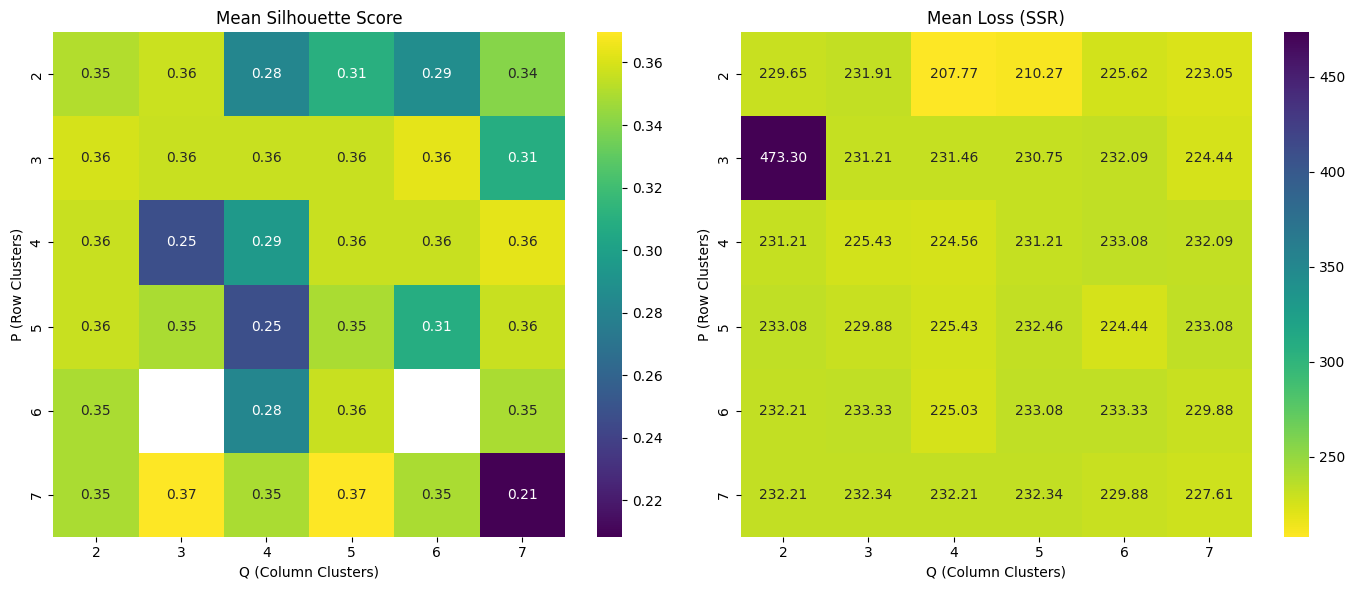

In [24]:
visualize_gdkm_cv_scores(results_df)

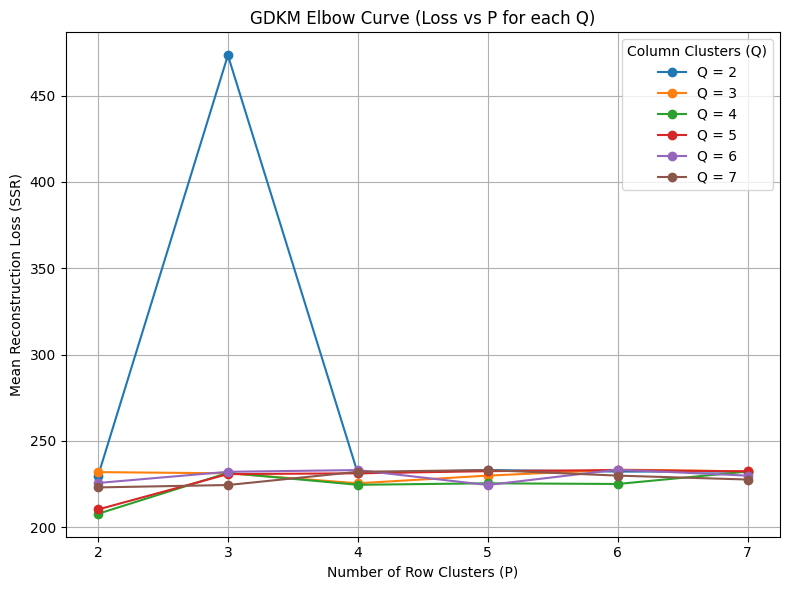

In [25]:
plot_gdkm_elbow_curve(results_df)

In [ ]:

U, V_list, C_blocks, _ = generalized_double_kmeans(
    X, P=4, Q_list=[5]*4, random_state=42
)

visualize_clustered_matrix(X, U, V_list, title="Sales Time-Series Clustering (Preprocessed)")
